# Спутник

Перфильев Данил

## Контекст

В Спутнике есть несколько основных каналов трафика. У каждого канала есть свои метрики для оценки эффективности его работы. Например, количество посещений сайта,  сумма просмотров отдельных страниц экскурсии и сумма заказов. 
Эффективность канала трафика оценивается как по фактическим величинам отдельных бизнесовых  метрик, так и на основе построенного прогноза для этих величин. 
Кроме того, при работе с трафиком одна из главных сложностей - получить чистые репрезентативные данные. 


## Задание

На примере города Анапа оценить эффективность работы каналов трафика

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#загрузка данных
orders_df = pd.read_csv("./orders.csv", index_col = 0)
visits_df = pd.read_csv("./visits.csv", index_col = 0)
views_df = pd.read_csv("./views.csv", index_col = 0)

In [3]:
orders_df.drop_duplicates(inplace = True)
visits_df.drop_duplicates(inplace = True)
views_df.drop_duplicates(inplace = True)

### 1.	Необходимо вычистить ботные и некорректные данные из набора данных visits.csv

#### a.	Нам известно, что на органический канал трафика приходят подозрительные посещения из браузера Chrome Mobile, при utm_source яндекс и мобильном девайсе. Необходимо вычистить посещения, которые отвечают описанным условиям.

In [4]:
#ознакомление с данными из visits.csv
visits_df.head()

,started_at,id,utm_medium,device_type,utm_source,browser
0,2023-03-01 02:50:00.564479,277249829,organic,Mobile,yandex,Chrome Mobile
1,2023-03-01 06:40:17.746113,277323126,organic,Tablet,yandex,Yandex Browser
2,2023-03-01 07:36:36.907793,277337231,organic,Mobile,yandex,Chrome Mobile
3,2023-03-01 07:48:37.006550,277340573,organic,Desktop,google,Chrome
4,2023-03-01 07:52:18.295917,277341578,affiliate,Desktop,affiliate_3421,Firefox


In [5]:
#получение данных, которые являются подозрительными в соответствии с условиями
suspicious_visits_df = visits_df[(visits_df['utm_medium'] == 'organic') & (visits_df['browser'] == 'Chrome Mobile') & (visits_df['utm_source'] == 'yandex') & (visits_df['device_type'] == 'Mobile')]

In [6]:
suspicious_visits_df.head()

,started_at,id,utm_medium,device_type,utm_source,browser
0,2023-03-01 02:50:00.564479,277249829,organic,Mobile,yandex,Chrome Mobile
2,2023-03-01 07:36:36.907793,277337231,organic,Mobile,yandex,Chrome Mobile
12,2023-03-01 10:26:00.760251,277397043,organic,Mobile,yandex,Chrome Mobile
30,2023-03-01 15:13:15.936808,277525286,organic,Mobile,yandex,Chrome Mobile
78,2023-03-01 17:37:49.336903,277589720,organic,Mobile,yandex,Chrome Mobile


In [7]:
#получение чистых данных, очистка в соответствии с условиями
cleaned_visits_df = visits_df.drop(suspicious_visits_df.index)

In [8]:
cleaned_visits_df.head()

,started_at,id,utm_medium,device_type,utm_source,browser
1,2023-03-01 06:40:17.746113,277323126,organic,Tablet,yandex,Yandex Browser
3,2023-03-01 07:48:37.006550,277340573,organic,Desktop,google,Chrome
4,2023-03-01 07:52:18.295917,277341578,affiliate,Desktop,affiliate_3421,Firefox
5,2023-03-01 07:52:21.296114,277341589,affiliate,Desktop,affiliate_3421,Chrome
6,2023-03-01 08:42:32.200535,277357036,organic,Tablet,yandex,Chrome


In [9]:
#сохранение чистых данных

In [10]:
cleaned_visits_df.to_csv('cleaned_visits.csv', index = False)

### 2.	Оценка эффективности работы органического канала трафика (=organic).

In [11]:
#получение данных органического канала после очистки
visits_organic_df = cleaned_visits_df[cleaned_visits_df['utm_medium'] == 'organic']
visits_organic_df.head()

,started_at,id,utm_medium,device_type,utm_source,browser
1,2023-03-01 06:40:17.746113,277323126,organic,Tablet,yandex,Yandex Browser
3,2023-03-01 07:48:37.006550,277340573,organic,Desktop,google,Chrome
6,2023-03-01 08:42:32.200535,277357036,organic,Tablet,yandex,Chrome
7,2023-03-01 08:59:11.331039,277362728,organic,Phablet,google,Samsung Browser
8,2023-03-01 09:02:42.078832,277363899,organic,Mobile,google,Chrome Mobile


In [12]:
#преобразование признака "started_at" - годы
visits_organic_df['year'] = pd.to_datetime(visits_organic_df['started_at']).dt.year

C:\Users\Данил\AppData\Local\Temp\ipykernel_27108\744849248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_organic_df['year'] = pd.to_datetime(visits_organic_df['started_at']).dt.year


In [13]:
#преобразование признака "started_at" - месяцы
visits_organic_df['month'] = pd.to_datetime(visits_organic_df['started_at']).dt.month

C:\Users\Данил\AppData\Local\Temp\ipykernel_27108\2539688531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_organic_df['month'] = pd.to_datetime(visits_organic_df['started_at']).dt.month


In [14]:
#преобразование признака "started_at" - дни
visits_organic_df['day'] = pd.to_datetime(visits_organic_df['started_at']).dt.day

C:\Users\Данил\AppData\Local\Temp\ipykernel_27108\2762777828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_organic_df['day'] = pd.to_datetime(visits_organic_df['started_at']).dt.day


In [15]:
#преобразование признака "started_at" - часы
visits_organic_df['hour'] = pd.to_datetime(visits_organic_df['started_at']).dt.hour

C:\Users\Данил\AppData\Local\Temp\ipykernel_27108\427431397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_organic_df['hour'] = pd.to_datetime(visits_organic_df['started_at']).dt.hour


In [16]:
visits_organic_df = visits_organic_df.drop('started_at', axis = 1)

In [17]:
visits_organic_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
1,277323126,organic,Tablet,yandex,Yandex Browser,2023,3,1,6
3,277340573,organic,Desktop,google,Chrome,2023,3,1,7
6,277357036,organic,Tablet,yandex,Chrome,2023,3,1,8
7,277362728,organic,Phablet,google,Samsung Browser,2023,3,1,8
8,277363899,organic,Mobile,google,Chrome Mobile,2023,3,1,9


#### a.	Предложи метрики, по которым мы сможем оценить эффективность органического канала трафика. 

Распределение посещений по месяцам

In [18]:
visits_organic_months_df = visits_organic_df.groupby(['year', 'month']).size().reset_index(name = 'visits')
visits_organic_months_df.head()

,year,month,visits
0,2023,3,29114
1,2023,4,33718
2,2023,5,43032
3,2023,6,63141
4,2023,7,81928


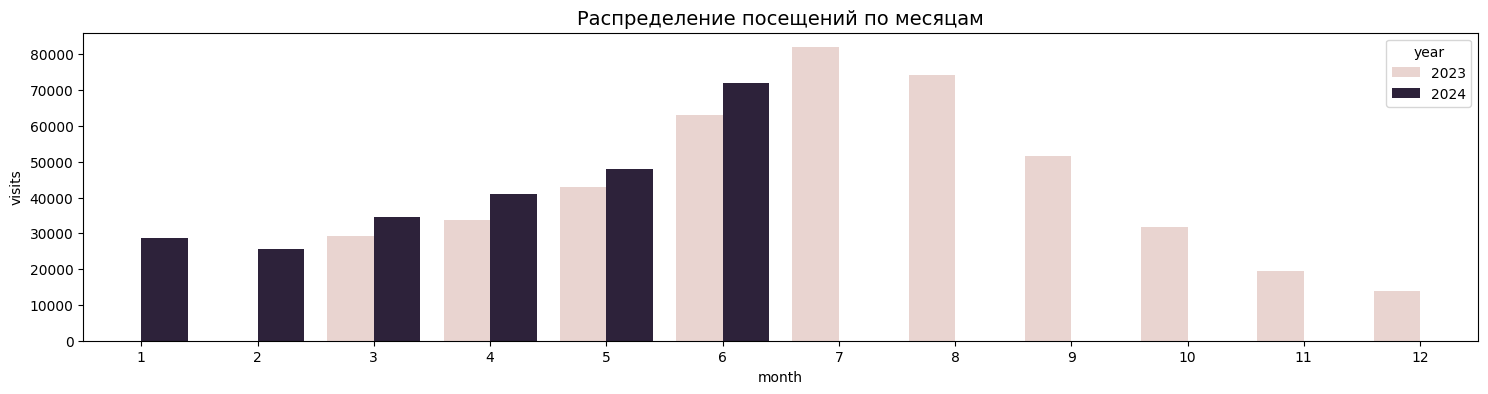

In [19]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_months_df, x = 'month', y = 'visits', hue = 'year')
plt.title('Распределение посещений по месяцам', fontsize = 14)
plt.show()

In [20]:
#из графика следует, что данные представлены не в полном объеме
#из данных можно провести сравнительную оценку по годам только для месяцев: март, апрель, май, июнь

In [21]:
visits_organic_years_df = visits_organic_df.groupby(['year']).size().reset_index(name = 'visits')
visits_organic_years_df

,year,visits
0,2023,441914
1,2024,249968


Количество посещений за период: март 2023 - июнь 2024

In [22]:
visits = len(visits_organic_df)
visits

691882

Количество посещений за каждый месяц за период: март 2023 - июнь 2024

In [23]:
visits_organic_months_df = visits_organic_df.groupby(['year', 'month']).size().reset_index(name = 'visits')

In [24]:
visits_organic_months_df.head()

,year,month,visits
0,2023,3,29114
1,2023,4,33718
2,2023,5,43032
3,2023,6,63141
4,2023,7,81928


Среднее количество посещений сервиса за период: март 2023 - июнь 2024

In [25]:
visits_organic_mean = visits_organic_months_df['visits'].mean()
visits_organic_mean

43242.625

Стандартное отклонение

In [26]:
visits_organic_std = visits_organic_months_df['visits'].std(ddof = 1)
visits_organic_std

20384.627920322706

Z-значение для 95% доверительного интервала

In [27]:
z = 1.96

Количество наблюдений

In [28]:
n = len(visits_organic_months_df)
n

16

Найдем доверительный интервал для среднего

In [29]:
ci_lower = visits_organic_mean - z * (visits_organic_std / np.sqrt(n))
ci_upper = visits_organic_mean + z * (visits_organic_std / np.sqrt(n))

print(f"Среднее количество посещений по всем имеющимся месяцам: {round(visits_organic_mean, 2)}")
print(f"95% доверительный интервал: [{round(ci_lower, 2)}, {round(ci_upper, 2)}]")

Среднее количество посещений по всем имеющимся месяцам: 43242.62
95% доверительный интервал: [33254.16, 53231.09]


In [30]:
# С 95% вероятностью истинное среднее значение посещений лежит в этом диапазоне, даже с учётом того, что некоторые месяцы отсутствуют

Сравнительный анализ данных

In [31]:
#для сравнительного анализа по годам возможна оценка только по месяцам: март, апрель, май, июнь

In [32]:
visits_organic_commons_df = visits_organic_df[(visits_organic_df['month'] == 3) | (visits_organic_df['month'] == 4) | (visits_organic_df['month'] == 5) | (visits_organic_df['month'] == 6)]
visits_organic_commons_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
1,277323126,organic,Tablet,yandex,Yandex Browser,2023,3,1,6
3,277340573,organic,Desktop,google,Chrome,2023,3,1,7
6,277357036,organic,Tablet,yandex,Chrome,2023,3,1,8
7,277362728,organic,Phablet,google,Samsung Browser,2023,3,1,8
8,277363899,organic,Mobile,google,Chrome Mobile,2023,3,1,9


Среднее количество посещений март - июнь (2023 - 2024)

In [33]:
visits_organic_commons_months_df = visits_organic_commons_df.groupby(['month', 'year']).size().reset_index(name = 'visits')
visits_organic_commons_months_df.head()

,month,year,visits
0,3,2023,29114
1,3,2024,34668
2,4,2023,33718
3,4,2024,41053
4,5,2023,43032


In [34]:
visits_organic_commons_months_mean = visits_organic_commons_months_df['visits'].mean()
print(f"Среднее количество посещений март-июнь (2023 - 2024): {(visits_organic_commons_months_mean)}")

Среднее количество посещений март-июнь (2023 - 2024): 45597.0


Распределение посещений по часам

In [35]:
visits_organic_hours_df = visits_organic_commons_df.groupby(['hour', 'year']).size().reset_index(name = 'visits')
visits_organic_hours_df.head()

,hour,year,visits
0,0,2023,3062
1,0,2024,3581
2,1,2023,1572
3,1,2024,1929
4,2,2023,972


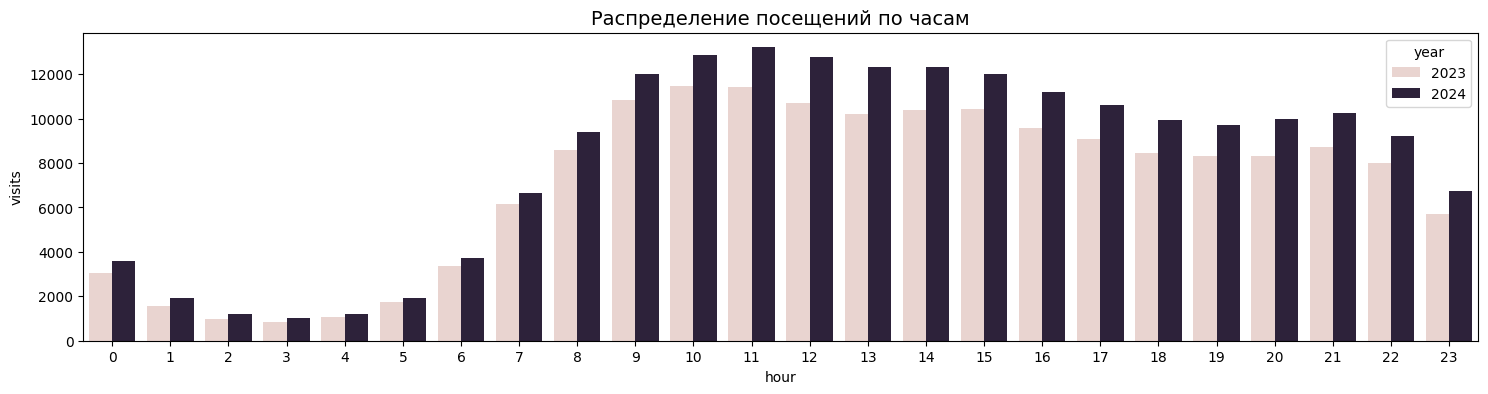

In [36]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_hours_df, x = 'hour', y = 'visits', hue = 'year')
plt.title('Распределение посещений по часам', fontsize = 14)
plt.show()

Распределение посещений по типам устройств

In [37]:
visits_organic_device_types_df = visits_organic_commons_df.groupby(['year', 'device_type']).size().reset_index(name = 'visits')
visits_organic_device_types_df.head()

,year,device_type,visits
0,2023,Desktop,24436
1,2023,Mobile,128206
2,2023,Phablet,5009
3,2023,TV,19
4,2023,Tablet,11333


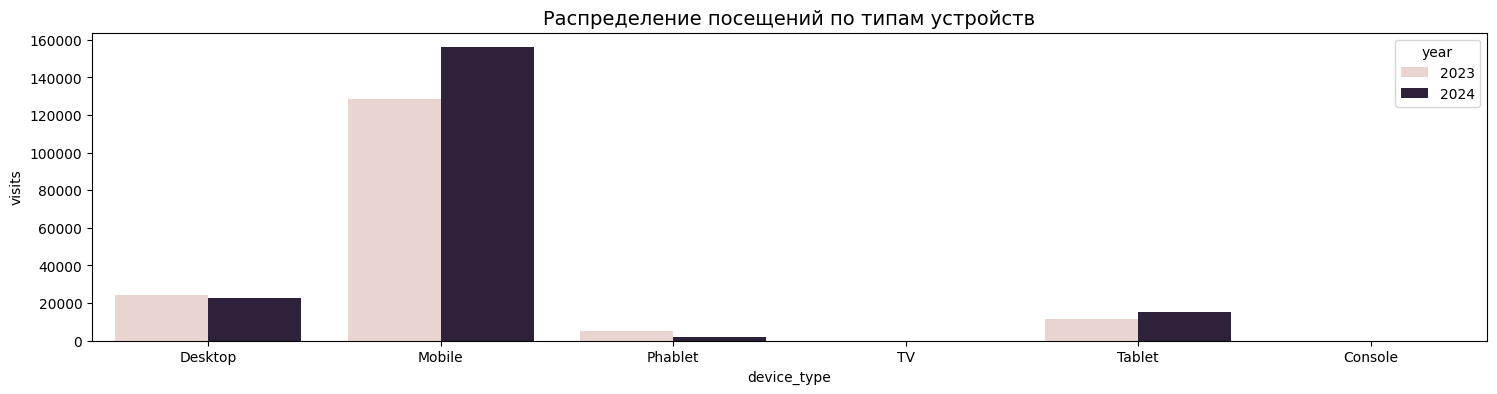

In [38]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_device_types_df, x = 'device_type', y = 'visits', hue = 'year')
plt.title('Распределение посещений по типам устройств', fontsize = 14)
plt.show()

Распределение посещений по браузерам

In [39]:
visits_organic_browsers_df = visits_organic_commons_df.groupby(['browser', 'year']).size().reset_index(name = 'visits')
visits_organic_browsers_df.head()

,browser,year,visits
0,Aloha Browser,2023,3
1,Aloha Browser,2024,1
2,Amigo,2023,4
3,Amigo,2024,2
4,Android Browser,2023,2


In [40]:
visits_organic_browsers_df['browser'].nunique()

47

In [41]:
visits_organic_browsers_df = visits_organic_browsers_df.sort_values(by = ['visits'], ascending = False)[:12]
visits_organic_browsers_df

,browser,year,visits
11,Chrome Mobile,2024,75100
10,Chrome Mobile,2023,52836
55,Mobile Safari,2024,43779
54,Mobile Safari,2023,39847
8,Chrome,2023,30387
9,Chrome,2024,30356
78,Yandex Browser,2024,28894
77,Yandex Browser,2023,27260
32,Google Search App,2024,3930
13,Chrome Mobile iOS,2024,3751


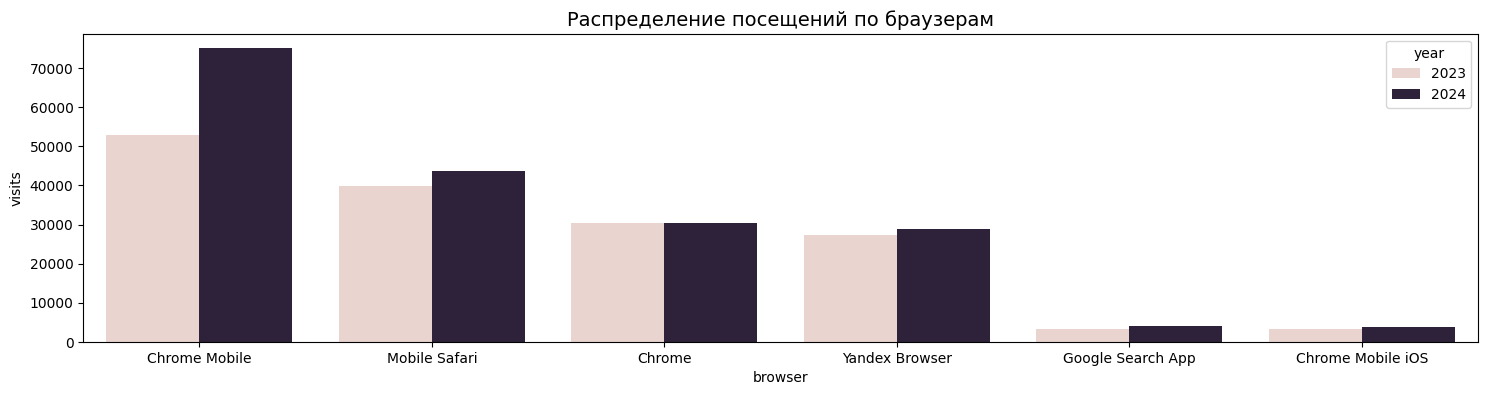

In [42]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_browsers_df, x = 'browser', y = 'visits', hue = 'year')
plt.title('Распределение посещений по браузерам', fontsize = 14)
plt.show()

#### b.	Объясни, как именно они помогают оценить эффективность

- Распределение посещений по месяцам - показывает сезонность и тренды органического трафика;
- Количество посещений - даёт базовую оценку масштаба канала;
- Среднее количество посещений - усреднённый показатель активности; 
- Доверительный интервал среднего показателя по посещениям - показывает надёжность среднего значения и разброс трафика;
- Распределение посещений по часам - определяет, в какое время пользователи чаще приходят;
- Распределение посещений по устройствам - помогает оптимизировать продукт (сайт, приложение) под наиболее используемые устройства;
- Распределение посещений по браузерам - полезно для технической оптимизации, чтобы сайт корректно работал в популярных браузерах.

#### c.	Какой месяц был самый удачный для этого канала, а какой самый неудачный?

In [43]:
visits_organic_months_df = visits_organic_df.groupby(['year', 'month']).size().reset_index(name = 'visits')
visits_organic_months_df.head()

,year,month,visits
0,2023,3,29114
1,2023,4,33718
2,2023,5,43032
3,2023,6,63141
4,2023,7,81928


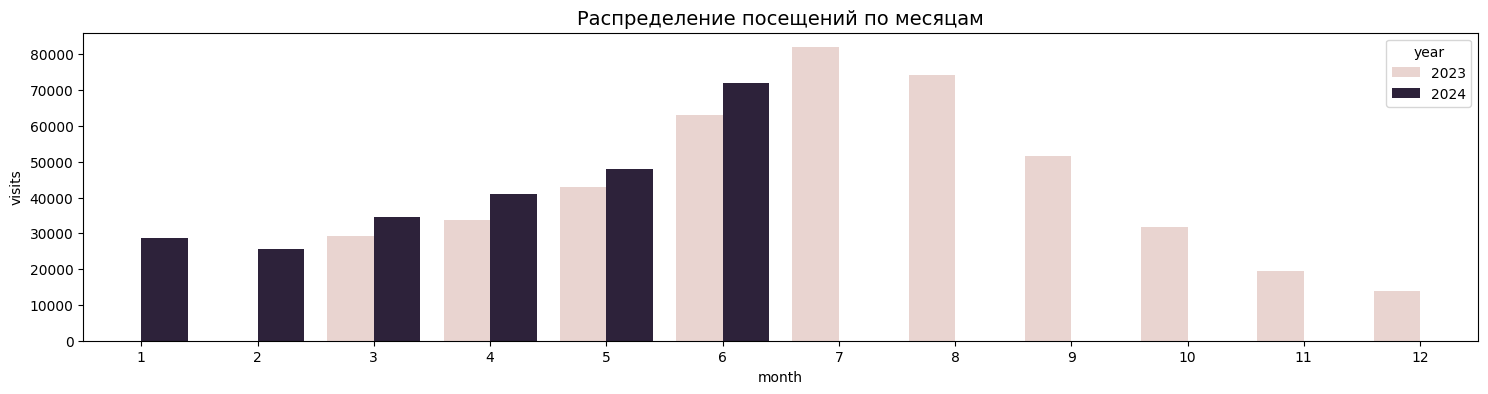

In [44]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_months_df, x = 'month', y = 'visits', hue = 'year')
plt.title('Распределение посещений по месяцам', fontsize = 14)
plt.show()

In [45]:
visits_organic_best = visits_organic_months_df['visits'].max()

visits_organic_best_month = visits_organic_months_df[visits_organic_months_df['visits'] == visits_organic_best]
visits_organic_best_month

print(f'Самый удачный месяц {visits_organic_best_month['month'].values[0]}')
print(f'Год: {visits_organic_best_month['year'].values[0]}')
print(f'Число посещений: {visits_organic_best_month['visits'].values[0]}')

Самый удачный месяц 7
Год: 2023
Число посещений: 81928


In [46]:
visits_organic_worst = visits_organic_months_df['visits'].min()

visits_organic_worst_month = visits_organic_months_df[visits_organic_months_df['visits'] == visits_organic_worst]
visits_organic_worst_month

print(f'Самый неудачный месяц {visits_organic_worst_month['month'].values[0]}')
print(f'Год: {visits_organic_worst_month['year'].values[0]}')
print(f'Число посещений: {visits_organic_worst_month['visits'].values[0]}')

Самый неудачный месяц 12
Год: 2023
Число посещений: 13829


### 3.	Прогноз посещений для органического канала трафика для июля-сентября 2024 года.

In [47]:
#оценка измененений по годам

In [48]:
visits_organic_2023_df = visits_organic_df[visits_organic_df['year'] == 2023]
visits_organic_2023_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
1,277323126,organic,Tablet,yandex,Yandex Browser,2023,3,1,6
3,277340573,organic,Desktop,google,Chrome,2023,3,1,7
6,277357036,organic,Tablet,yandex,Chrome,2023,3,1,8
7,277362728,organic,Phablet,google,Samsung Browser,2023,3,1,8
8,277363899,organic,Mobile,google,Chrome Mobile,2023,3,1,9


In [49]:
visits_organic_2023_months_df = visits_organic_2023_df.groupby(['month']).size().reset_index(name = 'visits')
visits_organic_2023_months_df.head()

,month,visits
0,3,29114
1,4,33718
2,5,43032
3,6,63141
4,7,81928


In [50]:
visits_organic_2024_df = visits_organic_df[visits_organic_df['year'] == 2024]
visits_organic_2024_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
73822,527961559,organic,Desktop,google,Chrome,2024,2,1,0
73823,527968251,organic,Mobile,google,Chrome Mobile,2024,2,1,0
73824,527991606,organic,Tablet,yandex,Yandex Browser,2024,2,1,2
74350,528035349,organic,Mobile,google,Chrome Mobile,2024,2,1,4
74351,528068572,organic,Mobile,google,Chrome Mobile,2024,2,1,6


In [51]:
visits_organic_2024_months_df = visits_organic_2024_df.groupby(['month']).size().reset_index(name = 'visits')
visits_organic_2024_months_df.head()

,month,visits
0,1,28584
1,2,25613
2,3,34668
3,4,41053
4,5,48032


In [52]:
visits_organic_difference_2023_2024_df = pd.merge(visits_organic_2023_months_df[['month', 'visits']], visits_organic_2024_months_df[['month', 'visits']], on = 'month', how = 'inner')
visits_organic_difference_2023_2024_df = visits_organic_difference_2023_2024_df.rename(columns = {'visits_x' : 'visits_2023', 'visits_y' : 'visits_2024'})
visits_organic_difference_2023_2024_df

,month,visits_2023,visits_2024
0,3,29114,34668
1,4,33718,41053
2,5,43032,48032
3,6,63141,72018


Разница по посещениям

In [53]:
visits_organic_difference_2023_2024_df['difference'] = visits_organic_difference_2023_2024_df['visits_2024'] - visits_organic_difference_2023_2024_df['visits_2023']
visits_organic_difference_2023_2024_df.head()

,month,visits_2023,visits_2024,difference
0,3,29114,34668,5554
1,4,33718,41053,7335
2,5,43032,48032,5000
3,6,63141,72018,8877


Прирост по посещениям в процентах 

In [54]:
visits_organic_difference_2023_2024_df['effect'] = round((visits_organic_difference_2023_2024_df['difference'] * 100) / visits_organic_difference_2023_2024_df['visits_2024'])
visits_organic_difference_2023_2024_df.head()

,month,visits_2023,visits_2024,difference,effect
0,3,29114,34668,5554,16.0
1,4,33718,41053,7335,18.0
2,5,43032,48032,5000,10.0
3,6,63141,72018,8877,12.0


Средний процент прироста по посещениям

In [55]:
visits_organic_difference_2023_2024_effect_mean = visits_organic_difference_2023_2024_df['effect'].mean()
visits_organic_difference_2023_2024_effect_mean

14.0

In [56]:
visits_organic_difference_2023_2024_effect_mean_coef = round(1 + visits_organic_difference_2023_2024_effect_mean / 100, 2)
visits_organic_difference_2023_2024_effect_mean_coef

1.14

In [57]:
visits_organic_2023_months_7_8_9_df = visits_organic_2023_months_df[(visits_organic_2023_months_df['month'] == 7) | (visits_organic_2023_months_df['month'] == 8) | (visits_organic_2023_months_df['month'] == 9)]
visits_organic_2023_months_7_8_9_df['year'] = 2023
visits_organic_2023_months_7_8_9_df.head()

C:\Users\Данил\AppData\Local\Temp\ipykernel_27108\1782840639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_organic_2023_months_7_8_9_df['year'] = 2023


,month,visits,year
4,7,81928,2023
5,8,74271,2023
6,9,51650,2023


Прогноз посещений для органического канала трафика июля-сентябрь 2024

In [58]:
visits_organic_2024_months_7_8_9_df = visits_organic_2023_months_7_8_9_df.copy()
visits_organic_2024_months_7_8_9_df['visits'] = round(visits_organic_2024_months_7_8_9_df['visits'] * visits_organic_difference_2023_2024_effect_mean_coef)
visits_organic_2024_months_7_8_9_df['year'] = 2024
visits_organic_2024_months_7_8_9_df.head()

,month,visits,year
4,7,93398.0,2024
5,8,84669.0,2024
6,9,58881.0,2024


In [59]:
#график для сравнения

In [60]:
visits_organic_2023_2024_months_7_8_9_df = pd.concat([visits_organic_2023_months_7_8_9_df, visits_organic_2024_months_7_8_9_df], axis = 0)
visits_organic_2023_2024_months_7_8_9_df

,month,visits,year
4,7,81928.0,2023
5,8,74271.0,2023
6,9,51650.0,2023
4,7,93398.0,2024
5,8,84669.0,2024
6,9,58881.0,2024


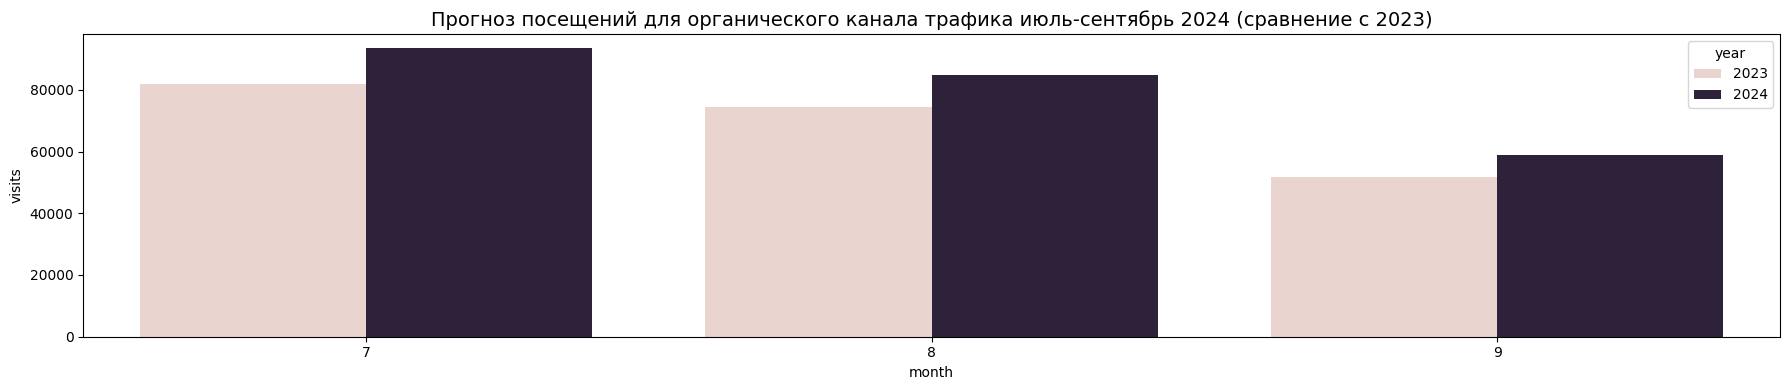

In [61]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_2023_2024_months_7_8_9_df, x = 'month', y = 'visits', hue = 'year')
plt.title('Прогноз посещений для органического канала трафика июль-сентябрь 2024 (сравнение с 2023)', fontsize = 14)
plt.tight_layout()
plt.show()

#### a.	Как изменится прогноз, если органический трафик будет работать эффективнее на 5%?

In [62]:
#коэффициент прироста с учетом эффективности в 5%
visits_organic_difference_2023_2024_effect_mean_5_coef  = visits_organic_difference_2023_2024_effect_mean_coef + 0.05
visits_organic_difference_2023_2024_effect_mean_5_coef

1.19

Прогноз посещений для органического канала трафика июля-сентябрь 2024 при увеличении эффективности на 5%

In [63]:
visits_organic_2024_months_7_8_9_5ef_df = visits_organic_2023_months_7_8_9_df.copy()
visits_organic_2024_months_7_8_9_5ef_df['visits'] = round(visits_organic_2024_months_7_8_9_5ef_df['visits'] * visits_organic_difference_2023_2024_effect_mean_5_coef)
visits_organic_2024_months_7_8_9_5ef_df['year'] = 2024
visits_organic_2024_months_7_8_9_5ef_df.head()

,month,visits,year
4,7,97494.0,2024
5,8,88382.0,2024
6,9,61464.0,2024


In [64]:
#график для сравнения

In [65]:
visits_organic_2023_2024_months_7_8_9_5ef_df = pd.concat([visits_organic_2023_months_7_8_9_df, visits_organic_2024_months_7_8_9_5ef_df], axis = 0)
visits_organic_2023_2024_months_7_8_9_5ef_df

,month,visits,year
4,7,81928.0,2023
5,8,74271.0,2023
6,9,51650.0,2023
4,7,97494.0,2024
5,8,88382.0,2024
6,9,61464.0,2024


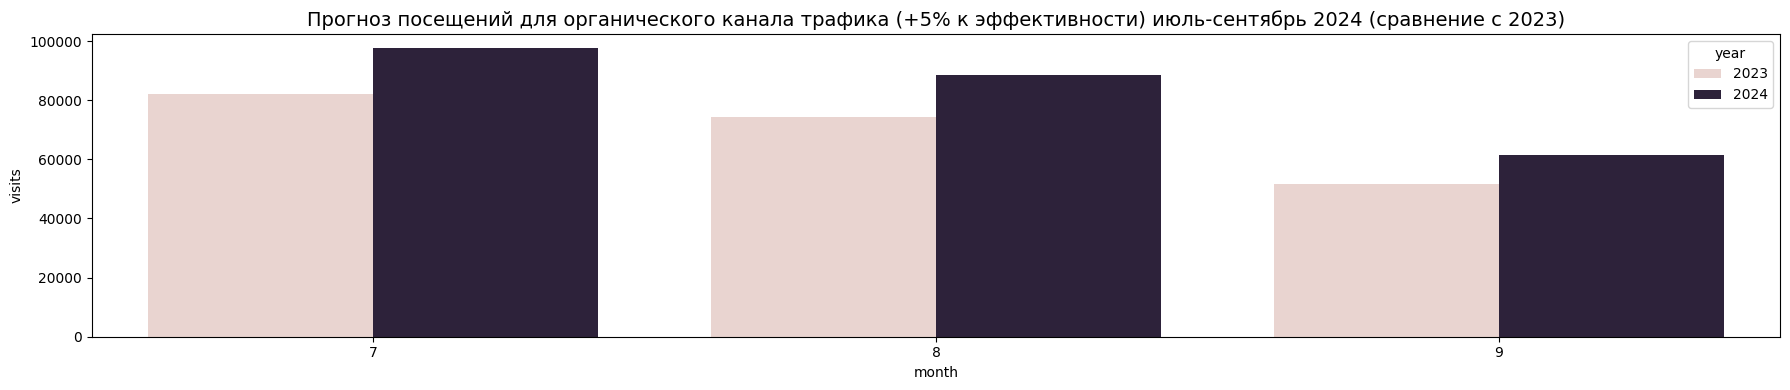

In [66]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_2023_2024_months_7_8_9_5ef_df, x = 'month', y = 'visits', hue = 'year')
plt.title('Прогноз посещений для органического канала трафика (+5% к эффективности) июль-сентябрь 2024 (сравнение с 2023)', fontsize = 14)
plt.tight_layout()
plt.show()

#### Восстановление хронологии за 2023 год

In [67]:
#составим датасет за 2023 год и восполним отсутствующие месяцы (январь, февраль) данными за 2024 год
#эффективность будет ниже на 14%

In [68]:
#получим данные за 2023 год
visits_organic_2023_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
1,277323126,organic,Tablet,yandex,Yandex Browser,2023,3,1,6
3,277340573,organic,Desktop,google,Chrome,2023,3,1,7
6,277357036,organic,Tablet,yandex,Chrome,2023,3,1,8
7,277362728,organic,Phablet,google,Samsung Browser,2023,3,1,8
8,277363899,organic,Mobile,google,Chrome Mobile,2023,3,1,9


In [69]:
#получим данные за 2024 год январь и февраль
visits_organic_2024_1_2_df = visits_organic_2024_df[(visits_organic_2024_df['month'] == 1) | (visits_organic_2024_df['month'] == 2)]
visits_organic_2024_1_2_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
73822,527961559,organic,Desktop,google,Chrome,2024,2,1,0
73823,527968251,organic,Mobile,google,Chrome Mobile,2024,2,1,0
73824,527991606,organic,Tablet,yandex,Yandex Browser,2024,2,1,2
74350,528035349,organic,Mobile,google,Chrome Mobile,2024,2,1,4
74351,528068572,organic,Mobile,google,Chrome Mobile,2024,2,1,6


In [70]:
#составим набор полных данных за год
visits_organic_2023_restored_df = pd.concat([visits_organic_2024_1_2_df, visits_organic_2023_df])
visits_organic_2023_restored_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month,day,hour
73822,527961559,organic,Desktop,google,Chrome,2024,2,1,0
73823,527968251,organic,Mobile,google,Chrome Mobile,2024,2,1,0
73824,527991606,organic,Tablet,yandex,Yandex Browser,2024,2,1,2
74350,528035349,organic,Mobile,google,Chrome Mobile,2024,2,1,4
74351,528068572,organic,Mobile,google,Chrome Mobile,2024,2,1,6


In [71]:
visits_organic_2023_restored_months_df = visits_organic_2023_restored_df.groupby(['month']).size().reset_index(name = 'visits')
visits_organic_2023_restored_months_df.head()

,month,visits
0,1,28584
1,2,25613
2,3,29114
3,4,33718
4,5,43032


In [72]:
#ранее было определено, что рост составил 14%
#к месяцем яварь и фревряль (2024) применим поправку (эффективность будет ниже на 14%)

In [73]:
visits_organic_2023_restored_months_df.loc[0: 1, 'visits'] = round(visits_organic_2023_restored_months_df.loc[0: 1, 'visits'] / visits_organic_difference_2023_2024_effect_mean_coef)
visits_organic_2023_restored_months_df

,month,visits
0,1,25074
1,2,22468
2,3,29114
3,4,33718
4,5,43032
5,6,63141
6,7,81928
7,8,74271
8,9,51650
9,10,31744


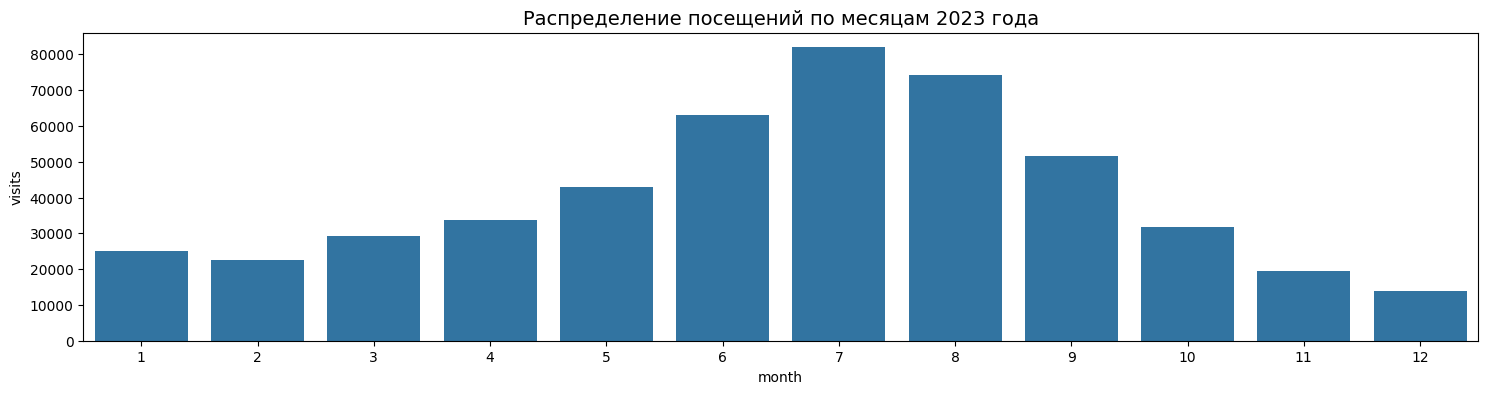

In [74]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_organic_2023_restored_months_df, x = 'month', y = 'visits')
plt.title('Распределение посещений по месяцам 2023 года', fontsize = 14)
plt.show()

In [75]:
visits_organic_2023_restored_months_mean =  visits_organic_2023_restored_months_df['visits'].mean()
print(f'Среднее количество посещений за 2023 год: {visits_organic_2023_restored_months_mean}')

Среднее количество посещений за 2023 год: 40788.0


### 4. Канал с самым высоким потенциалом

In [76]:
#оценка за весь период 2023 - 2024

In [77]:
visits_utm_medium_df = visits_df.copy()

In [78]:
visits_utm_medium_df['year'] = pd.to_datetime(visits_df['started_at']).dt.year

In [79]:
visits_utm_medium_df['month'] = pd.to_datetime(visits_df['started_at']).dt.month

In [80]:
visits_utm_medium_df = visits_utm_medium_df.drop('started_at', axis = 1)

In [81]:
visits_utm_medium_df.head()

,id,utm_medium,device_type,utm_source,browser,year,month
0,277249829,organic,Mobile,yandex,Chrome Mobile,2023,3
1,277323126,organic,Tablet,yandex,Yandex Browser,2023,3
2,277337231,organic,Mobile,yandex,Chrome Mobile,2023,3
3,277340573,organic,Desktop,google,Chrome,2023,3
4,277341578,affiliate,Desktop,affiliate_3421,Firefox,2023,3


Распределение посещений по каналам трафика за весь период

In [82]:
visits_utm_medium_years_df = visits_utm_medium_df.groupby(['utm_medium', 'year']).size().reset_index(name = 'visits')
visits_utm_medium_years_df.head()

,utm_medium,year,visits
0,affiliate,2023,28667
1,affiliate,2024,15096
2,cpc,2023,27599
3,cpc,2024,39656
4,organic,2023,471898


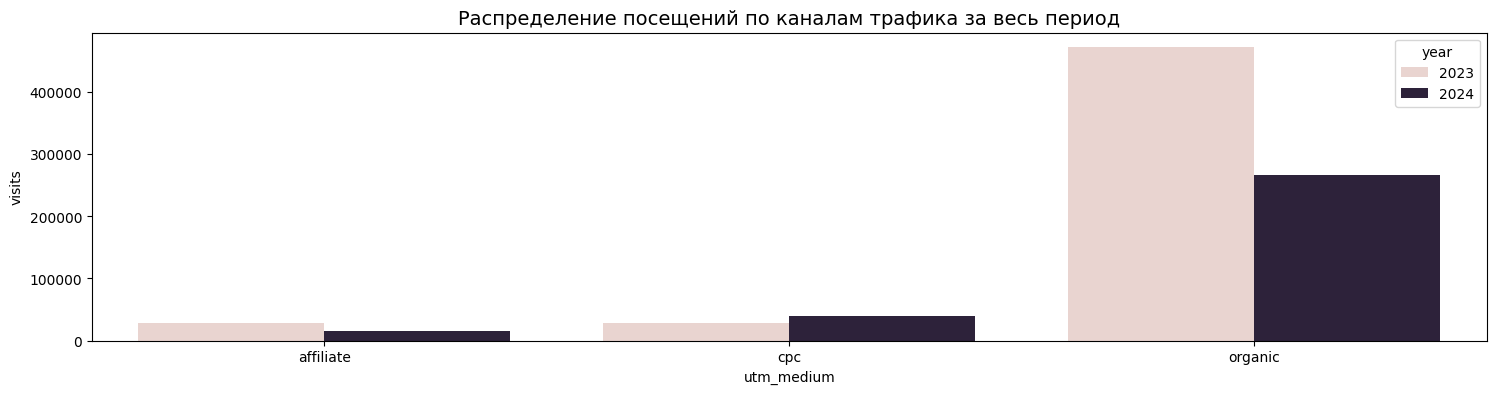

In [83]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_utm_medium_years_df, x = 'utm_medium', y = 'visits', hue = 'year')
plt.title('Распределение посещений по каналам трафика за весь период', fontsize = 14)
plt.show()

Распределение посещений по каналам трафика по месяцам

In [84]:
visits_utm_medium_months_df = visits_utm_medium_df.groupby(['utm_medium', 'month', 'year']).size().reset_index(name = 'visits')
visits_utm_medium_months_df.head()

,utm_medium,month,year,visits
0,affiliate,1,2024,2103
1,affiliate,2,2024,1642
2,affiliate,3,2023,2000
3,affiliate,3,2024,2074
4,affiliate,4,2023,2498


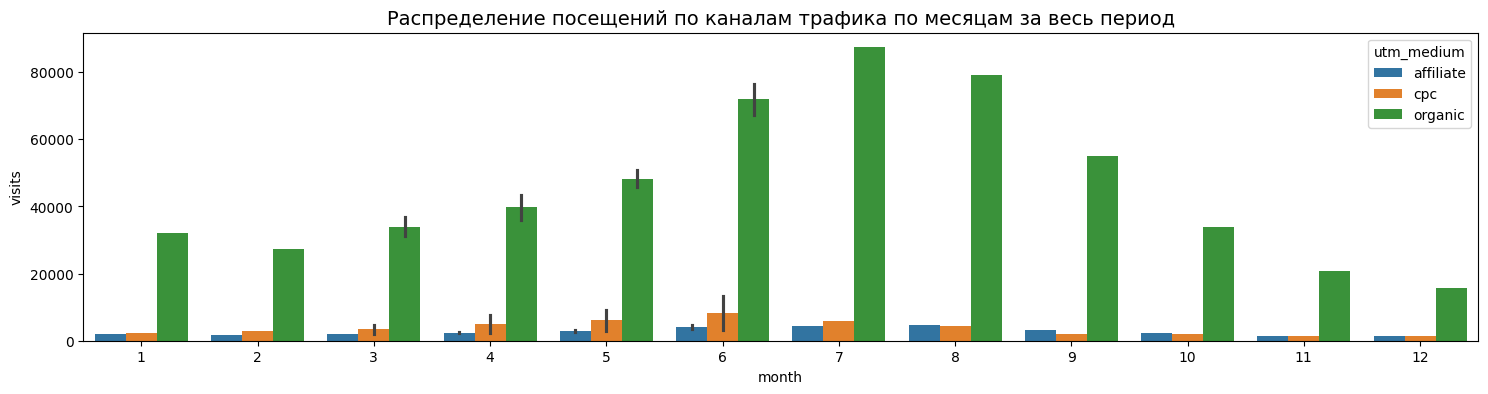

In [85]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_utm_medium_months_df, x = 'month', y = 'visits', hue = 'utm_medium')
plt.title('Распределение посещений по каналам трафика по месяцам за весь период', fontsize = 14)
plt.show()

Органический канал - самый популярный. <br>
Из данных следует, что cpc и affiliate создают наименьший прирост трафика. 

### 5. Комментарии по заданию

#### a.	Посмотри на сайт и на полученные данные, и предложи, как можно улучшить метрики эффективности разных каналов. 

- При поиске в Yandex Browser по запросу "спутник экскурсии" первый сайт - Tripster, в браузерах Edge и Google Chrome Спутник занимает первую позицию, возможно стоит купить рекламу по брендовому запросу «спутник экскурсии» (Яндекс.Директ);
- Совершенствование affiliate канала возможно через привлечение блогеров, оптимизацию SMM. Я изучил социальные сети, указанные на сайте (VK, Telegram), публикации осуществляются в отношении 1 пост в 1-2 дня, что довольно мало, нет контент-различий: одинаковый контент публикуется в VK и Telegram.

#### b.	Как ты думаешь, почему каждый канал отличается по эффективности? 

Эффективность каналов трафика отличается потому, что у каждого из них — своя природа привлечения.
- Organic — люди сами ищут и приходят по ключам, часто уже с намерением купить, следовательно, высокая конверсия, но медленный рост.
- CPC — можно быстро привести тёплую аудиторию, если настроен таргетинг, но часть кликов — случайные, следовательно, конверсия ниже.
- Affiliate — аудитория приходит по рекомендации партнёров, и их мотивация может быть разной.

- В органике все зависит от алгоритмов поисковых систем.
- В CPC — всё под контролем, но за деньги.
- В партнёрке — зависимость от активности партнёров и качества их трафика.

#### c.	Достаточно ли данных для выводов, почему? Какие дополнительные метрики бизнеса или улучшения сайта ты можешь предложить и почему?

- Наличие признака 'ended_at' (visits) обеспечит информацией о продолжительности посещения сервиса;
- Среднее время на сайте / на странице экскурсии - можно найти точки, где пользователи уходят слишком быстро;
- Путь пользователя (в какие экскурсии заходят чаще всего и в каком порядке) - для оптимизации внутренней навигации.


### Анализ посещений, заказов, просмотров: март 2023 - июнь 2024

#### Посещения и заказы

In [86]:
#изучим "чистый" набор данных о посещениях

In [87]:
cleaned_visits_2_df = cleaned_visits_df.copy()
cleaned_visits_2_df = cleaned_visits_2_df.rename(columns = {'id' : 'visit_id'})
cleaned_visits_2_df = cleaned_visits_2_df.drop('started_at', axis = 1)
cleaned_visits_df.head()

,started_at,id,utm_medium,device_type,utm_source,browser
1,2023-03-01 06:40:17.746113,277323126,organic,Tablet,yandex,Yandex Browser
3,2023-03-01 07:48:37.006550,277340573,organic,Desktop,google,Chrome
4,2023-03-01 07:52:18.295917,277341578,affiliate,Desktop,affiliate_3421,Firefox
5,2023-03-01 07:52:21.296114,277341589,affiliate,Desktop,affiliate_3421,Chrome
6,2023-03-01 08:42:32.200535,277357036,organic,Tablet,yandex,Chrome


In [88]:
cleaned_visits_2_df['visit_id'].nunique()

802900

In [89]:
cleaned_visits = len(cleaned_visits_2_df)
print(f'Число посещений: {cleaned_visits}')

Число посещений: 802900


In [90]:
orders_df = orders_df.rename(columns = {'id' : 'order_id'})
orders_df.head()

,created_at,order_id,visit_id,state
0,2024-01-14 11:25:22.889597,2019060,515725102.0,held
1,2024-01-05 12:17:37.790378,2009076,509837645.0,held
2,2024-03-06 21:13:36.779976,2094016,552236470.0,held
3,2024-02-10 22:39:52.937576,2052647,534974347.0,held
4,2024-02-18 18:58:46.747766,2064185,540372323.0,canceled


Информация о посещения и заказах

In [91]:
visits_orders_state_df = pd.merge(cleaned_visits_2_df, orders_df, on = 'visit_id', how = 'inner')
visits_orders_state_df.head()

,visit_id,utm_medium,device_type,utm_source,browser,created_at,order_id,state
0,277645089,organic,Mobile,google,Mobile Safari,2023-03-01 19:58:44.153719,1069226,canceled
1,277899506,organic,Desktop,yandex,Firefox,2023-03-02 08:31:25.383312,1069697,held
2,277899506,organic,Desktop,yandex,Firefox,2023-03-02 08:37:49.352254,1069707,canceled
3,277899506,organic,Desktop,yandex,Firefox,2023-03-02 08:33:34.314937,1069702,canceled
4,277899506,organic,Desktop,yandex,Firefox,2023-03-02 08:34:48.654282,1069705,canceled


In [92]:
visits_orders_state_df['year'] = pd.to_datetime(visits_orders_state_df['created_at']).dt.year
visits_orders_state_df['month'] = pd.to_datetime(visits_orders_state_df['created_at']).dt.month
visits_orders_state_df = visits_orders_state_df.drop('created_at', axis = 1)
visits_orders_state_df.head()

,visit_id,utm_medium,device_type,utm_source,browser,order_id,state,year,month
0,277645089,organic,Mobile,google,Mobile Safari,1069226,canceled,2023,3
1,277899506,organic,Desktop,yandex,Firefox,1069697,held,2023,3
2,277899506,organic,Desktop,yandex,Firefox,1069707,canceled,2023,3
3,277899506,organic,Desktop,yandex,Firefox,1069702,canceled,2023,3
4,277899506,organic,Desktop,yandex,Firefox,1069705,canceled,2023,3


In [93]:
visits_with_orders = len(visits_orders_state_df)
print(f'Число всех заказов: {visits_with_orders}')

Число всех заказов: 11712


In [94]:
orders_months_years_df = visits_orders_state_df.groupby(['month', 'year', 'state']).size().reset_index(name = 'orders')
orders_months_years_df.head()

,month,year,state,orders
0,1,2024,canceled,208
1,1,2024,held,197
2,2,2024,canceled,176
3,2,2024,held,187
4,3,2023,canceled,270


Распределение заказов по месяцам

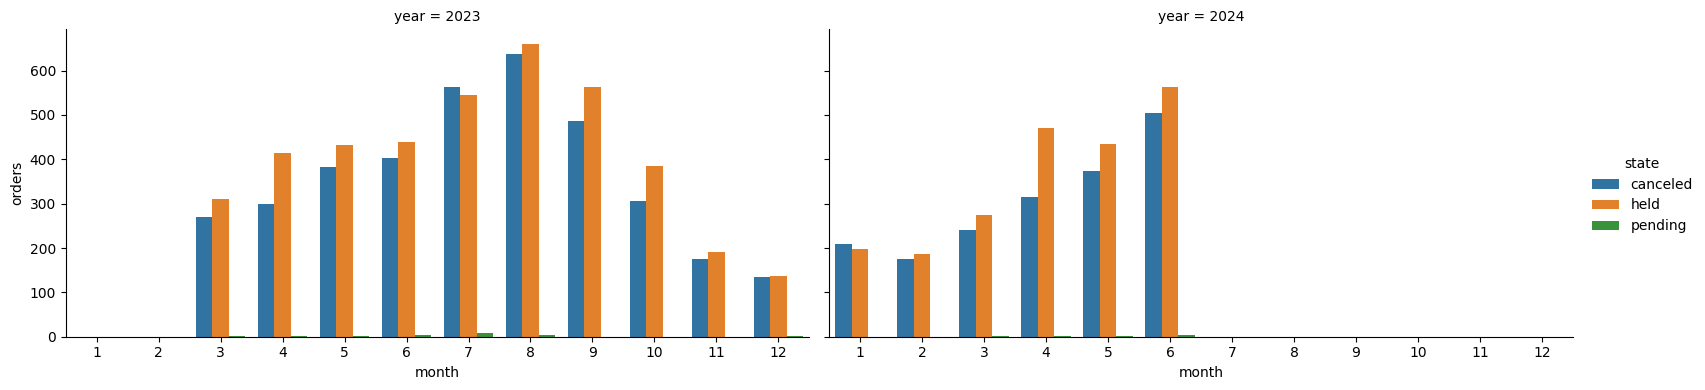

In [95]:
sns.catplot(
    data = orders_months_years_df,
    kind = 'bar',
    x = 'month',
    y = 'orders',
    hue = 'state',
    col = 'year',
    height = 4,
    aspect = 2
)
plt.show()

Успешные заказы

In [96]:
visits_orders_state_held_df = visits_orders_state_df[visits_orders_state_df['state'] == 'held']
visits_orders_state_held_df.head()

,visit_id,utm_medium,device_type,utm_source,browser,order_id,state,year,month
1,277899506,organic,Desktop,yandex,Firefox,1069697,held,2023,3
6,278070885,affiliate,Desktop,affiliate_151,Chrome,1070344,held,2023,3
7,278221792,organic,Desktop,google,Safari,1070820,held,2023,3
9,279270477,organic,Mobile,google,Chrome Mobile,1073561,held,2023,3
10,277787564,organic,Mobile,yandex,Mobile Safari,1069582,held,2023,3


In [97]:
visits_orders_state_held = len(visits_orders_state_held_df)
print(f'Число успешных заказов: {visits_orders_state_held}')

Число успешных заказов: 6207


Заказы еще не проведенных на момент выгрузки

In [98]:
visits_orders_state_pending_df = visits_orders_state_df[visits_orders_state_df['state'] == 'pending']
visits_orders_state_pending_df.head()

,visit_id,utm_medium,device_type,utm_source,browser,order_id,state,year,month
244,290286451,organic,Mobile,yandex,Yandex Browser,1109156,pending,2023,3
644,382183663,cpc,Mobile,yandex,Chrome Mobile,1549765,pending,2023,7
698,386491261,organic,Mobile,google,Mobile Safari,1574217,pending,2023,7
1800,405736670,affiliate,Desktop,affiliate_151,Chrome,1681640,pending,2023,8
1991,417769419,organic,Mobile,google,Google Search App,1729350,pending,2023,8


In [99]:
visits_orders_state_pending = len(visits_orders_state_pending_df)
print(f'Число еще не проведенных на момент выгрузки заказов: {visits_orders_state_pending}')

Число еще не проведенных на момент выгрузки заказов: 28


Отмененные заказы

In [100]:
visits_orders_state_canceled_df = visits_orders_state_df[visits_orders_state_df['state'] == 'canceled']
visits_orders_state_canceled_df.head()

,visit_id,utm_medium,device_type,utm_source,browser,order_id,state,year,month
0,277645089,organic,Mobile,google,Mobile Safari,1069226,canceled,2023,3
2,277899506,organic,Desktop,yandex,Firefox,1069707,canceled,2023,3
3,277899506,organic,Desktop,yandex,Firefox,1069702,canceled,2023,3
4,277899506,organic,Desktop,yandex,Firefox,1069705,canceled,2023,3
5,277973531,organic,Mobile,google,Chrome Mobile,1070014,canceled,2023,3


In [101]:
visits_orders_state_canceled = len(visits_orders_state_canceled_df)
print(f'Число отмененных заказов: {visits_orders_state_canceled}')

Число отмененных заказов: 5477


Соотношение заказов

In [102]:
visits_orders_states_df = pd.DataFrame({'state': ['held', 'pending', 'canceled'], 'amount': [visits_orders_state_held, visits_orders_state_pending, visits_orders_state_canceled]})
visits_orders_states_df

,state,amount
0,held,6207
1,pending,28
2,canceled,5477


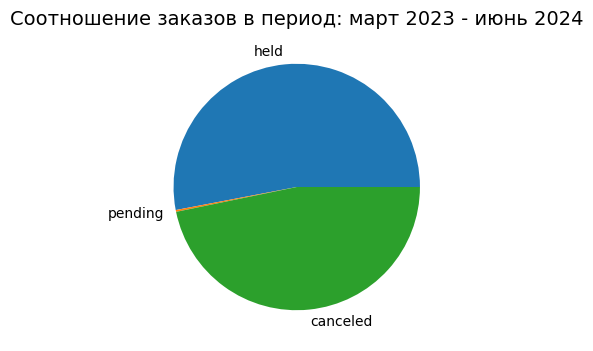

In [103]:
plt.figure(figsize = (18, 4))
plt.pie(x = visits_orders_states_df['amount'], labels = visits_orders_states_df['state'] )
plt.title('Соотношение заказов в период: март 2023 - июнь 2024', fontsize = 14)
plt.show()

Конверсия

In [104]:
conversion_rate = round((visits_with_orders / cleaned_visits) * 100, 2)
print(f'Соотношение совершивших заказ к числу всех посещений: {conversion_rate}%')

Соотношение совершивших заказ к числу всех посещений: 1.46%


In [105]:
conversion_rate = round((visits_orders_state_held / cleaned_visits) * 100, 2)
print(f'Соотношение успешных заказов к числу всех посещений: {conversion_rate}%')

Соотношение успешных заказов к числу всех посещений: 0.77%


In [106]:
conversion_rate = round((visits_orders_state_canceled / cleaned_visits) * 100, 2)
print(f'Соотношение отменённых заказов к числу всех посещений: {conversion_rate}%')

Соотношение отменённых заказов к числу всех посещений: 0.68%


#### Посещения и просмотры

In [107]:
views_df = views_df.rename(columns = {'id' : 'view_id'})
views_df.head()

,time,view_id,visit_id
0,2024-06-30 20:20:48.141495,119089860,661384025
1,2024-06-30 20:21:02.648150,119089916,661384025
2,2024-06-30 20:23:51.727024,119090574,661384025
3,2024-06-30 20:49:01.842606,119096406,661384025
4,2024-06-30 20:52:11.079409,119097078,661609161


In [108]:
cleaned_visits_2_df.head()

,visit_id,utm_medium,device_type,utm_source,browser
1,277323126,organic,Tablet,yandex,Yandex Browser
3,277340573,organic,Desktop,google,Chrome
4,277341578,affiliate,Desktop,affiliate_3421,Firefox
5,277341589,affiliate,Desktop,affiliate_3421,Chrome
6,277357036,organic,Tablet,yandex,Chrome


In [109]:
visits_views_df = pd.merge(views_df, cleaned_visits_2_df, on = 'visit_id', how = 'inner')
visits_views_df.head()

,time,view_id,visit_id,utm_medium,device_type,utm_source,browser
0,2024-06-30 20:20:48.141495,119089860,661384025,organic,Mobile,google,Chrome Mobile iOS
1,2024-06-30 20:21:02.648150,119089916,661384025,organic,Mobile,google,Chrome Mobile iOS
2,2024-06-30 20:23:51.727024,119090574,661384025,organic,Mobile,google,Chrome Mobile iOS
3,2024-06-30 20:49:01.842606,119096406,661384025,organic,Mobile,google,Chrome Mobile iOS
4,2024-06-30 20:52:11.079409,119097078,661609161,organic,Mobile,google,Mobile Safari


Распределение просмотров по месяцам

In [110]:
visits_views_months_df = visits_views_df.copy()
visits_views_months_df['month'] = pd.to_datetime(visits_views_months_df['time']).dt.month
visits_views_months_df['year'] = pd.to_datetime(visits_views_months_df['time']).dt.year
visits_views_months_df.head()

,time,view_id,visit_id,utm_medium,device_type,utm_source,browser,month,year
0,2024-06-30 20:20:48.141495,119089860,661384025,organic,Mobile,google,Chrome Mobile iOS,6,2024
1,2024-06-30 20:21:02.648150,119089916,661384025,organic,Mobile,google,Chrome Mobile iOS,6,2024
2,2024-06-30 20:23:51.727024,119090574,661384025,organic,Mobile,google,Chrome Mobile iOS,6,2024
3,2024-06-30 20:49:01.842606,119096406,661384025,organic,Mobile,google,Chrome Mobile iOS,6,2024
4,2024-06-30 20:52:11.079409,119097078,661609161,organic,Mobile,google,Mobile Safari,6,2024


In [111]:
visits_views_months_df = visits_views_months_df.groupby(['month', 'year']).size().reset_index(name = 'views')
visits_views_months_df.head()

,month,year,views
0,1,2024,15126
1,2,2024,15671
2,3,2023,21368
3,3,2024,21883
4,4,2023,24811


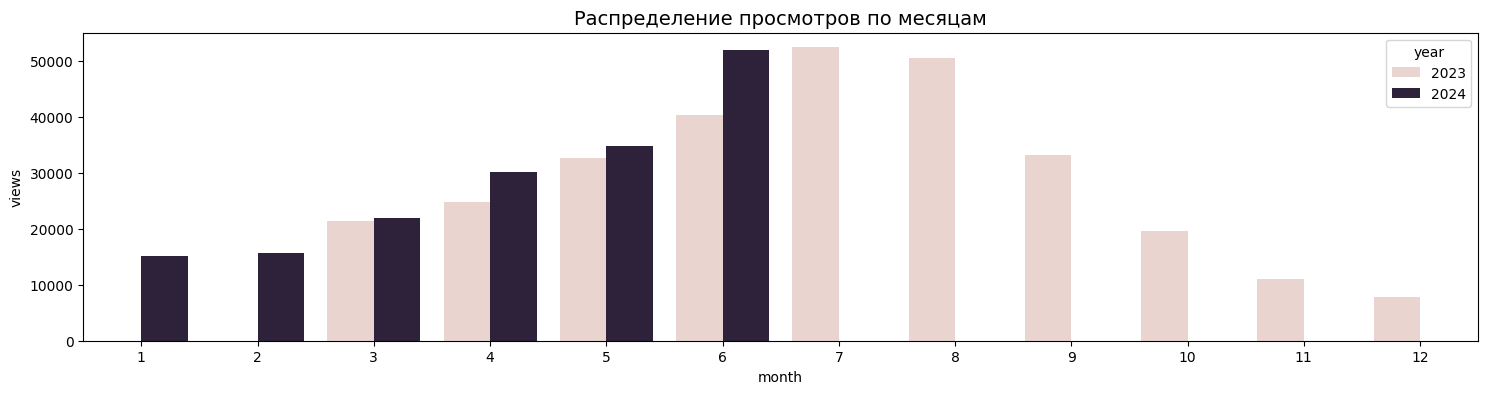

In [112]:
plt.figure(figsize = (18, 4))
sns.barplot(data = visits_views_months_df, x = 'month', y = 'views', hue = 'year')
plt.title('Распределение просмотров по месяцам', fontsize = 14)
plt.show()

Рейтинг посещений

In [113]:
top_visitors = visits_views_df['visit_id'].value_counts()[:10]
top_visitors

visit_id
355668607    117
320558814     80
647137593     56
649392885     50
322890056     49
385153725     49
277615912     49
316104652     47
577179877     47
658891038     46
Name: count, dtype: int64

In [114]:
top_visitors_df = pd.DataFrame({'visit_id' : top_visitors.index, 'views' : top_visitors.values})
top_visitors_df.head()

,visit_id,views
0,355668607,117
1,320558814,80
2,647137593,56
3,649392885,50
4,322890056,49


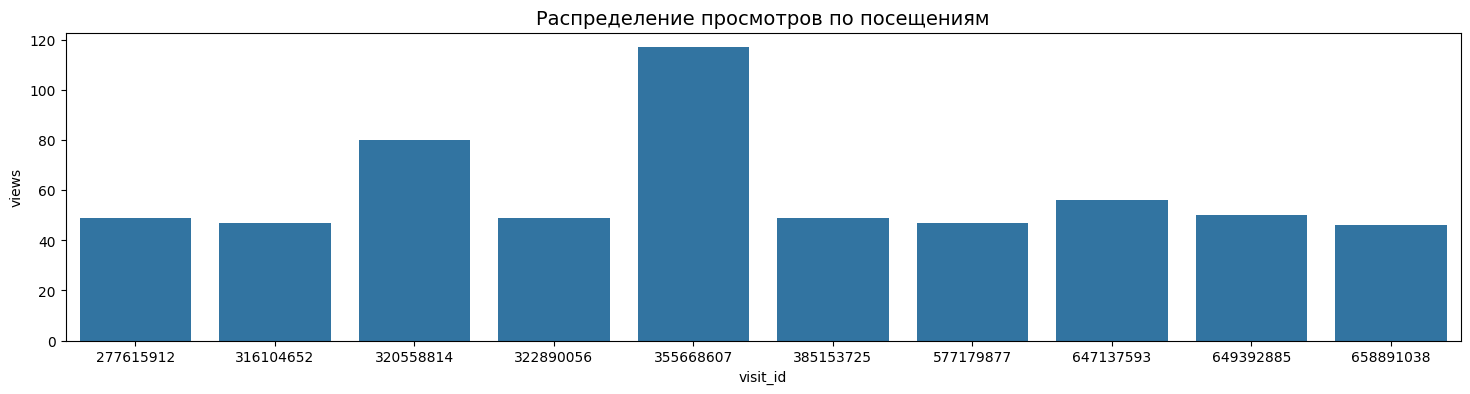

In [115]:
plt.figure(figsize = (18, 4))
sns.barplot(data = top_visitors_df, x = 'visit_id', y = 'views')
plt.title('Распределение просмотров по посещениям', fontsize = 14)
plt.show()